In [1]:
import pandas as pd
df = pd.read_csv('https://bit.ly/fish_csv_data')
df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
fish_data = df[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = df['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, test_size=0.2, random_state=42
)

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [6]:
from sklearn.linear_model import SGDClassifier

In [9]:
sc = SGDClassifier(loss='log_loss', n_jobs=-1) # 로지스틱 손실 함수 - binary crossentropy, categorical crossentropy 

In [10]:
sc.fit(train_scaled, train_target)

,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,-1


In [11]:
print("훈련세트:", sc.score(train_scaled, train_target))
print("테스트세트:", sc.score(test_scaled, test_target))

훈련세트: 0.8661417322834646
테스트세트: 0.90625


In [12]:
sc.partial_fit(train_scaled, train_target)

,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,-1


In [13]:
print("훈련세트:", sc.score(train_scaled, train_target))
print("테스트세트:", sc.score(test_scaled, test_target))

훈련세트: 0.937007874015748
테스트세트: 0.90625


In [14]:
sc.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype='<U9')

In [16]:
import numpy as np

np.round(sc.predict_proba(test_scaled[:5]), decimals=3)

array([[0.   , 0.   , 0.53 , 0.   , 0.47 , 0.   , 0.   ],
       [0.   , 0.   , 0.008, 0.   , 0.201, 0.791, 0.   ],
       [0.   , 0.   , 0.   , 0.987, 0.013, 0.   , 0.   ],
       [0.   , 0.   , 0.827, 0.   , 0.172, 0.   , 0.   ],
       [0.   , 0.   , 0.56 , 0.   , 0.44 , 0.   , 0.   ]])

In [24]:
sc = SGDClassifier(max_iter=1, tol=None, loss='log_loss')
sc.fit(train_scaled, train_target)

,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1
,tol,None
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [25]:
train_score = []
test_score = []
train_score.append(sc.score(train_scaled, train_target)) # 훈련 세트 정확도
test_score.append(sc.score(test_scaled, test_target)) # 테스트 세트 정확도

for _ in range(599):
    sc.partial_fit(train_scaled, train_target)
    train_score.append(sc.score(train_scaled, train_target)) # 훈련 세트 정확도
    test_score.append(sc.score(test_scaled, test_target)) # 테스트 세트 정확도


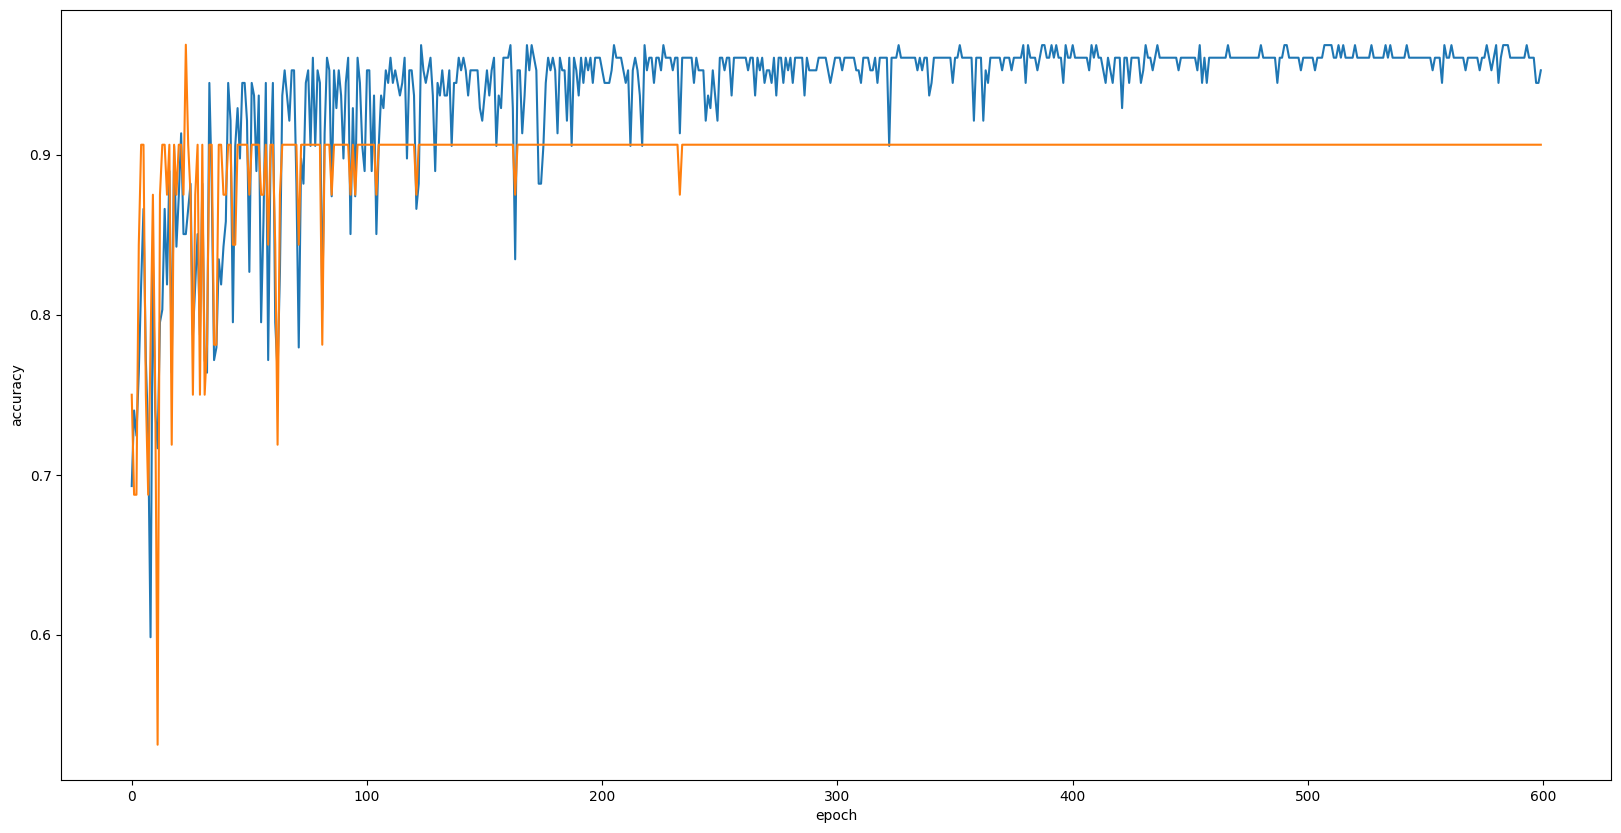

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [31]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None)
sc.fit(train_scaled, train_target)

,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,100
,tol,None
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [32]:
print("훈련세트:", sc.score(train_scaled, train_target))
print("테스트세트:", sc.score(test_scaled, test_target))

훈련세트: 0.9606299212598425
테스트세트: 0.90625
